In [30]:
# Time Based Learning Rate Decay
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
# load dataset
dataframe = read_csv("/home/anish/Downloads/ionosphere.data", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
# create model
model = Sequential()
model.add(Dropout(0.1))
model.add(Dense(32, input_shape=(34,), activation='relu'))
model.add(Dense(64, input_shape=(34,), activation='relu'))
model.add(Dense(32, input_shape=(34,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# epochs = 50
# learning_rate = 0.1
# decay_rate = learning_rate / epochs
# momentum = 0.8
# sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# # Fit the model
# model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

In [31]:
for layer in model.layers:
        print(layer.get_config())

{'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.1, 'noise_shape': None, 'seed': None}
{'name': 'dense_12', 'trainable': True, 'batch_input_shape': (None, 34), 'dtype': 'float32', 'units': 32, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_13', 'trainable': True, 'batch_input_shape': (None, 34), 'dtype': 'float32', 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'dense_14', 'trainable': True, 'batch_in

In [37]:
from tensorflow.keras.activations import tanh, relu
for layer in model.layers:
        layer.activation = relu

In [43]:
for layer in model.layers:
        try:print(layer.get_config()["activation"])
        except Exception: None
#         if layer.get_config()["activation"] == "tanh":
#             print(True)

relu
relu
relu
tanh


In [50]:
a = [[1,2],[100,200]]
print(a[0][0])

1


In [40]:
model.layers[-1].activation = tanh

In [42]:
model.layers[-1].get_config()["activation"]

'tanh'

In [46]:
model.layers[-1].activation

<function tensorflow.python.keras.activations.tanh(x)>

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np
import matplotlib.pyplot as plt

In [9]:
epoch = 50
optimizer = Adam(lr = 1e-3)
model.compile(loss = "mean_squared_error", optimizer = optimizer)
lr_schedule = LearningRateScheduler(lambda epoch : 1e-5 * 10**(epoch/10))
history = model.fit(X, Y, epochs = epoch, batch_size = 32, callbacks = [lr_schedule])

2022-08-15 20:26:56.358818: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-08-15 20:26:56.378755: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2899885000 Hz


Epoch 1/50


2022-08-15 20:26:58.000966: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


11/11 [==============================] - 2s 1ms/step - loss: 0.4452
Epoch 2/50
11/11 [==============================] - 0s 1ms/step - loss: 0.4208
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 0.4047
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 5/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3690
Epoch 6/50
11/11 [==============================] - 0s 1ms/step - loss: 0.3059
Epoch 7/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2936
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.2832
Epoch 9/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2354
Epoch 10/50
11/11 [==============================] - 0s 1ms/step - loss: 0.2147
Epoch 11/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1720
Epoch 12/50
11/11 [==============================] - 0s 1ms/step - loss: 0.1565
Epoch 13/50
11/11 [==============================] - 0s 1ms/

(1e-05, 0.1, 0.0, 0.5)

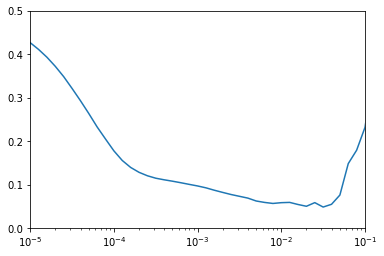

In [10]:
lrs = 1e-5 * 10**(np.arange(50)/10)
history.history["loss"]
plt.semilogx(lrs,history.history["loss"])
plt.axis([1e-5, 1e-1, 0, 0.5])

In [11]:
len(lrs)

50

In [12]:
len(history.history["loss"])

50

In [13]:
losses = history.history["loss"].copy()
print(min(losses))
print(losses.index(min(losses)))
print(lrs[losses.index(min(losses))])
print(round(lrs[losses.index(min(losses))],5))

0.048180997371673584
35
0.0316227766016838
0.03162


In [14]:
best_lr = round(lrs[losses.index(min(losses))],5)
print(best_lr)
type(best_lr)

0.03162


numpy.float64

In [9]:
import tensorflow as tf

In [10]:
# epoch = 100
# optimizer_new = Adam(lr = best_lr)
# model.compile(loss = "mean_squared_error", optimizer = optimizer_new)
# history = model.fit(X, Y, epochs = epoch, batch_size = 32)

In [11]:
# tf.keras.backend.clear_session()
# new_model = Sequential()
# new_model.add(Dense(32, input_shape=(34,), activation='relu'))
# new_model.add(Dense(64, input_shape=(34,), activation='relu'))
# new_model.add(Dense(32, input_shape=(34,), activation='relu'))
# new_model.add(Dense(1, activation='sigmoid'))
# epoch = 100
# optimizer_new = Adam(lr = best_lr)
# new_model.compile(loss = "mean_squared_error", optimizer = optimizer_new)
# history = new_model.fit(X, Y, epochs = epoch, batch_size = 32)

In [12]:
def reinitialize_model(model, initializer = tf.keras.initializers.random_uniform()):
    for layer in model.layers:
        layer.set_weights([initializer(shape=w.shape) for w in layer.get_weights()])

In [13]:
reinitialize_model(model)
epoch = 100
optimizer_new = Adam(lr = best_lr)
model.compile(loss = "mean_squared_error", optimizer = optimizer_new)
history = model.fit(X, Y, epochs = epoch, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 0.2428
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 0.1850
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 0.1540
Epoch 4/100
11/11 [==============================] - 0s 1ms/step - loss: 0.1076
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0627
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0477
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0327
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 10/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0168
Epoch 11/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 12/100
11/11 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 13/100
11/11 [=================